In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, set_matplotlib_formats
%matplotlib inline
%config InlineBackend.figure_format='retina' # Mayor densidad pixeles
plt.rcParams['figure.dpi'] =100           # Tamaño de la imagem

In [2]:
def Gaussian(x):
    x0 = 30. 
    sigma = np.sqrt(15.)
    return np.exp(-(x-x0)**2/(2*sigma**2))

In [3]:
def Sinusoidal(x):
    L=100
    return np.sin(4*np.pi*x/L)

In [4]:
def init():
    line.set_data([], [])
    return (line,)
def animate(i):
    x = xgrid
    y = psi[int(Nt/200)*i,:]
    line.set_data(x, y)
    return (line,)

In [5]:
name_fun='Sinusoidal'

if name_fun=='Gaussian':
    function=Gaussian
    ymin=0.
elif name_fun=='Sinusoidal':
    function=Sinusoidal
    ymin=-1.1
else:
    print('Check writting')

In [6]:
# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 1001
xgrid = np.linspace(x_i, x_f, Nx)
dx = xgrid[1] - xgrid[0]


t_i = 0.
t_f = 1000.
Nt = 1001
tgrid = np.linspace(t_i, t_f, Nt)
dt = tgrid[1] - tgrid[0]

# Velocity of the advection
v = 0.1

CFL=v*dt/dx
print(f'CFL = {CFL:.2f}')

CFL = 1.00


In [ ]:
def upwind(Psi0, tgrid, xgrid):
    psi = np.zeros([len(tgrid), len(xgrid)])
    psi[0] = Psi0(xgrid)
    for n in range(len(tgrid)-1):
        for j in range(1,len(xgrid)-1):
            psi[n+1,j] = psi[n,j] - ((v*dt)/(dx))*(psi[n,j] - psi[n,j-1])
            psi[n+1,0] = psi[n+1,-2]
            psi[n+1,-1] = psi[n+1,-2]
    return psi

start = time.time()
psi = upwind(function, tgrid, xgrid)
end = time.time()
total_time = end - start
print(f'El tiempo de computo fue de {total_time:.2f} segundos')

print('dt = ', dt)
print('dx = ', dx)
plt.figure(figsize=(7,5))
plt.plot(xgrid, psi[0,:], label=f'$t =$ {tgrid[0]:.0f}')
plt.plot(xgrid, psi[-1,:], label=f'$t =$ {tgrid[-1]:.0f}')
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(t,x)$')
plt.legend()
plt.show()

In [ ]:
fig, ax=plt.subplots()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(t,x)$')

# En esta lista se almacenan los frames de la animación
imgs = []
#Aqui esta el loop principal.
# En cada paso se crea una linea con la función localizada en un valor de x0
# y se escribe el titulo con el tiempodel frame
for i in np.linspace(0,50,100):
    line, = ax.plot(xgrid, psi, color='crimson')#ax.plot(a[:,i])
    title = ax.text(2.,0.95,f'Time = {i:.2f}')
    # Aqui se agrega la imagen a la lista
    imgs.append([line, title])

# La función ArtistAnimation() une las imagenes de la lista para crear el
# objeto con la información de la animación
anim = animation.ArtistAnimation(fig, imgs, interval=50, blit=False)

# Para visualizar la animación en jupyter se debe transformar a otro formato.
# Por ejmplo qui se transforma a un video de javascript
HTML(anim.to_jshtml())

In [ ]:
# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 100))
ax.set_ylim((ymin, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\psi$ (t,x)')

line, = ax.plot([], [], lw=2)
#Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)
def animate(i):
    x = xgrid
    y = psi[int(Nt/200)*i,:] # We take only some of the frames (given by 50*i)
    line.set_data(x, y)
    return (line,)
#anim = animation.ArtistAnimation(fig, animate, interval=20,  # only 200 frames with a duration of 20 ms each
 #                              blit=True)

In [ ]:
HTML(anim.to_jshtml())

# Lax-Friedrich

# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 10000
xgrid = np.linspace(x_i, x_f, Nx)
dx = xgrid[1] - xgrid[0]


t_i = 0.
t_f = 1000.
Nt = 1000
tgrid = np.linspace(t_i, t_f, Nt)
dt = tgrid[1] - tgrid[0]


In [ ]:
def LaxFriedrich(Psi0, tgrid, xgrid):
    psi = np.zeros([len(tgrid), len(xgrid)])
    psi[0] = Psi0(xgrid)
    for n in range(len(tgrid)-1):
        for j in range(1,len(xgrid)-1):
            psi[n+1,j] =0.5*( psi[n,j+1]+psi[n,j-1]) - ((v*dt)/(2*dx))*(psi[n,j+1] - psi[n,j-1])
            if v>0:
                psi[n+1,0] = psi[n+1,-2]
                psi[n+1,-1] = psi[n+1,-2]
            else:
                psi[n+1,0] = psi[n+1,1]
                psi[n+1,-1] = psi[n+1,0]
    return psi

start = time.time()
psi = LaxFriedrich(function, tgrid, xgrid)
end = time.time()
total_time = end - start
print(f'El tiempo de computo fue de {total_time:.2f} segundos')

print('dt = ', dt)
print('dx = ', dx)
plt.figure(figsize=(7,5))
plt.plot(xgrid, psi[0,:], label=f'$t =$ {tgrid[0]:.0f}')
plt.plot(xgrid, psi[-1,:], label=f'$t =$ {tgrid[-1]:.0f}')
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(t,x)$')
plt.legend()
plt.show()

In [ ]:
# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( x_i, x_f))
ax.set_ylim((ymin, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\psi(t,x)$')

line, = ax.plot([], [], lw=2)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 ms each
                               blit=True)

In [ ]:
HTML(anim.to_jshtml())

# Leap Frog

x_i = 0.
x_f = 100.
Nx = 1000
xgrid = np.linspace(x_i, x_f, Nx)
dx = xgrid[1] - xgrid[0]

t_i = 0.
t_f = 1000.
Nt = 2000
tgrid = np.linspace(t_i, t_f, Nt)
dt = tgrid[1] - tgrid[0]

In [ ]:
def LeapFrog(Psi0, tgrid, xgrid):
    psi = np.zeros([len(tgrid), len(xgrid)])
    psi[0] = Psi0(xgrid)
    psi[1] = psi[0]
    for n in range(1,len(tgrid)-1):
        for j in range(1,len(xgrid)-1):
            psi[n+1,j] =(psi[n-1,j])-((v*dt)/(dx))*(psi[n,j+1] - psi[n,j-1])
            if v>0:
                psi[n+1,0] = psi[n+1,-2]
                psi[n+1,-1] = psi[n+1,-2]
            else:
                psi[n+1,0] = psi[n+1,1]
                psi[n+1,-1] = psi[n+1,0]
    return psi

start = time.time()
psi = LeapFrog(function, tgrid, xgrid)
end = time.time()
total_time = end - start
print(f'El tiempo de computo fue de {total_time:.2f} segundos')

print('dt = ', dt)
print('dx = ', dx)
print(v*dt/dx)
plt.figure(figsize=(7,5))
plt.plot(xgrid, psi[0,:], label=f'$t =$ {tgrid[0]:.0f}')
plt.plot(xgrid, psi[-1,:], label=f'$t =$ {tgrid[-1]:.0f}')
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(t,x)$')
plt.legend()
plt.show()

In [ ]:
# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( x_i, x_f))
ax.set_ylim(( ymin, 1.1))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\psi(t,x)$')

line, = ax.plot([], [], lw=2)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 ms each
                               blit=True)

In [ ]:
HTML(anim.to_jshtml())

# Lax Wendroff

x_i = 0.
x_f = 100.
Nx = 101
xgrid = np.linspace(x_i, x_f, Nx)
dx = xgrid[1] - xgrid[0]


t_i = 0.
t_f = 1000.
Nt = 101
tgrid = np.linspace(t_i, t_f, Nt)
dt = tgrid[1] - tgrid[0]
v=0.1
CFL=v*dt/dx
theta = (v*dt/dx)**2
print(dx,dt,CFL,theta)

x_i = 0.
x_f = 100.
Nx = 101
xgrid = np.linspace(x_i, x_f, Nx)
psi = np.zeros([len(tgrid), len(xgrid)])
psi[0]=Gaussian(xgrid)
print(psi[0])

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

def Gaussian(x):
    x0 = 30. 
    sigma = np.sqrt(15.)
    return np.exp(-np.power((x-x0),2)/(2*np.power(sigma,2)))

x_i = 0.
x_f = 100.
Nx = 1001
xgrid = np.linspace(x_i, x_f, Nx)
dx = xgrid[1] - xgrid[0]


t_i = 0.
t_f = 1000.
Nt = 1001
tgrid = np.linspace(t_i, t_f, Nt)
dt = tgrid[1] - tgrid[0]
v=0.1
CFL=v*dt/dx
theta = (v*dt/dx)**2

El tiempo de computo fue de 18.69 segundos
dt =  1.0
dx =  0.1


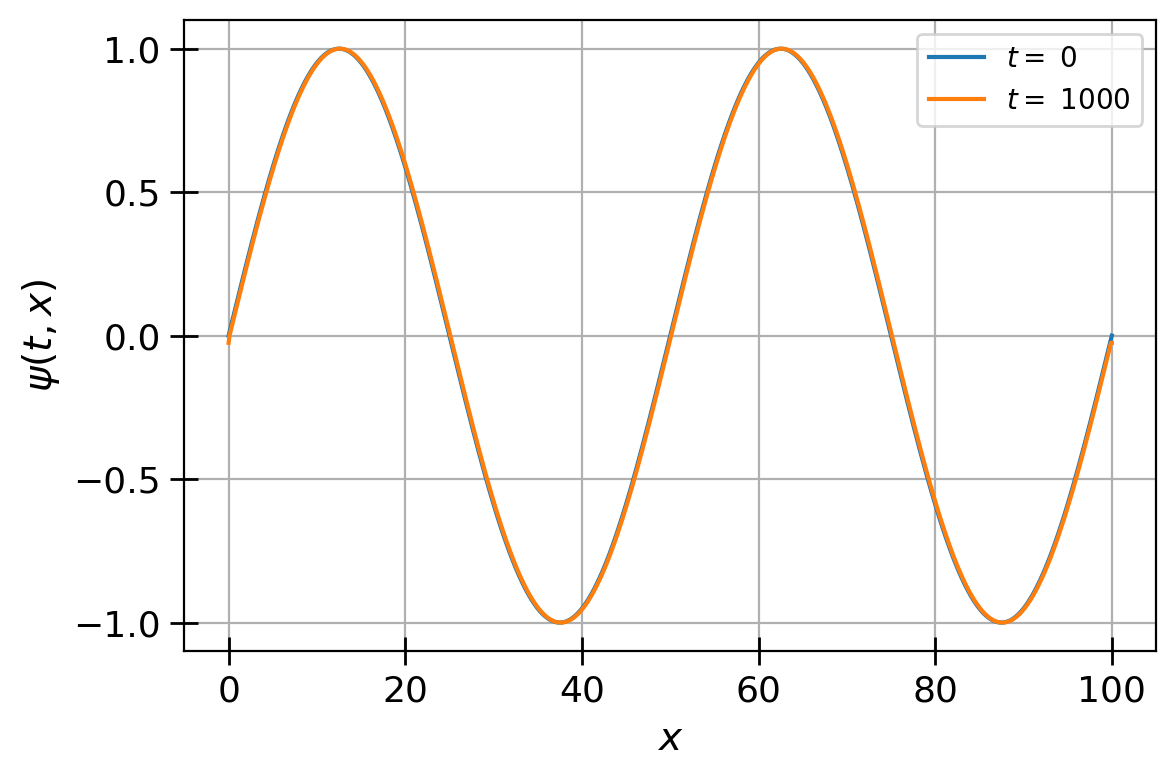

In [8]:
def LaxWendroff(Psi0, tgrid, xgrid):
    psi = np.zeros([len(tgrid), len(xgrid)])
    psi[0] = Psi0(xgrid)
    for n in range(len(tgrid)-1):
        for j in range(1,len(xgrid)-1):
            psi[n+1,j]=psi[n,j]-((v*dt)/(2*dx))*(psi[n,j+1]-psi[n,j-1])+((np.power(v,2)*np.power(dt,2))/(2*np.power(dx,2)))*(psi[n,j-1]-2*psi[n,j]+ psi[n,j+1])
            if v>0:
                psi[n+1,0] = psi[n+1,-2]
                psi[n+1,-1] = psi[n+1,-2]
            else:
                psi[n+1,0] = psi[n+1,1]
                psi[n+1,-1] = psi[n+1,0]
    return psi

start = time.time()
psi = LaxWendroff(function, tgrid, xgrid)
end = time.time()
total_time = end - start
print(f'El tiempo de computo fue de {total_time:.2f} segundos')

print('dt = ', dt)
print('dx = ', dx)
plt.figure()
plt.plot(xgrid, psi[0,:], label=f'$t =$ {tgrid[0]:.0f}')
plt.plot(xgrid, psi[-1,:], label=f'$t =$ {tgrid[-1]:.0f}')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$\psi(t,x)$',fontsize=14)
plt.tick_params(axis = 'both', labelsize=13, direction= 'inout', length=10, width=1.)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('f12.pdf')
plt.show()

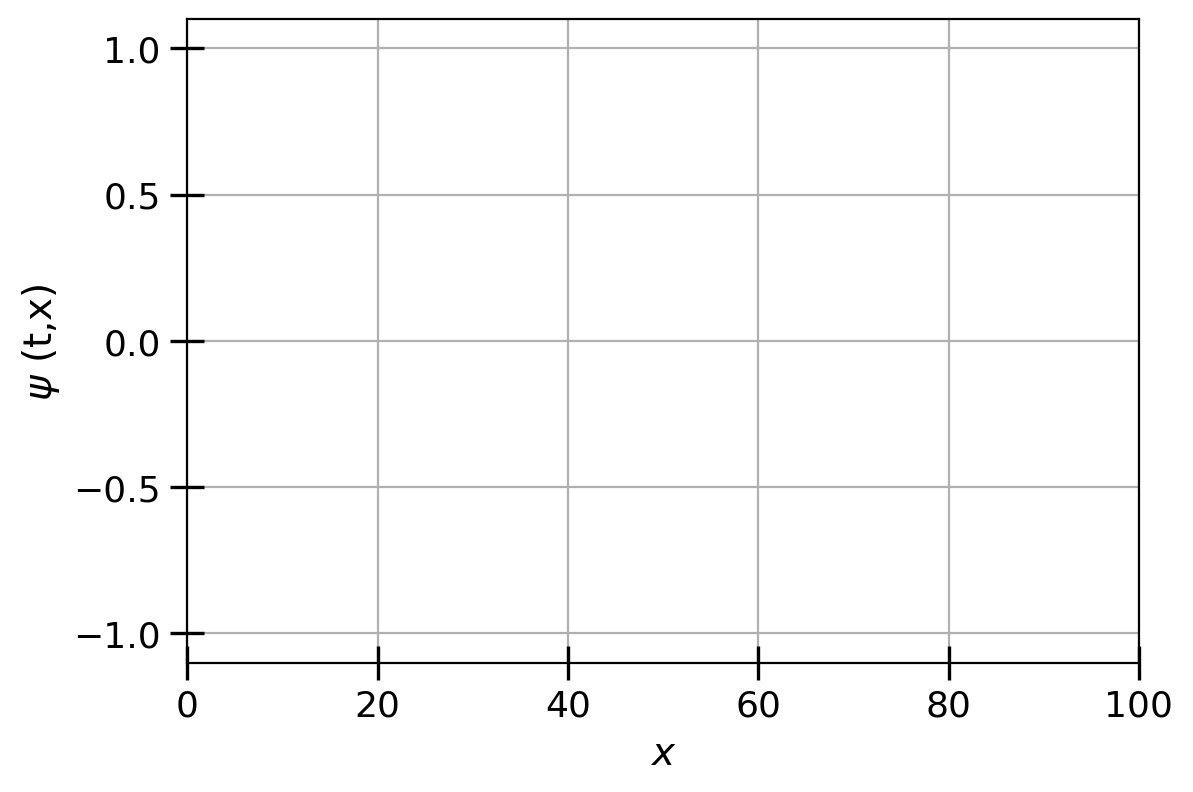

In [9]:
fig, ax = plt.subplots()

ax.set_xlim(( x_i, x_f))
ax.set_ylim(( ymin, 1.1))
ax.set_xlabel(r'$x$',fontsize=14)
ax.set_ylabel(r'$\psi$ (t,x)',fontsize=14)
ax.grid()
plt.tight_layout()
ax.tick_params(axis = 'both', labelsize=13, direction= 'inout', length=12, width=1.2)
line, = ax.plot([], [], lw=2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20,  # only 200 frames with a duration of 20 ms each
                               blit=True)

In [10]:
writergif = animation.PillowWriter(fps=200) 

anim.save("2D_Schrodinger_Equation.gif", writer = writergif,dpi=150)

In [11]:
HTML(anim.to_jshtml())

# Test py

scheme = 2                        # Chose your scheme: 1 (upwind), 2 (centered/Lax-Wendroff)
Nx = 10001;                         # Number of grid points
xmax = 100.;                        # Domain limit to the right
xmin = 0.;                       # Domain limit to the left
dx = (xmax-xmin)/(Nx-1)           # Mesh size
dt = 0.0401                        # Time step
c = 0.8                           # Advection speed
CFL = c*dt/dx                     # CFL number
x = np.arange(xmin,xmax,dx)       # Discretized mesh
U = np.exp( -0.5 * (x/0.4)**2 )   # Initial solution
Uex = U                           # Exact solution
t_end = 5.                        # Final time
Nt = int(t_end/dt)                # Number of iterations
t = np.linspace(0.,t_end,Nt+1)    # Time vector


#===============================================================
# Temporal loop
#===============================================================
for n in range (1,len(t)):
  
  # Solve equation using upwind scheme
  if (scheme == 1):
    
      Un = U
      if (c>0.):
          Um = np.roll(Un,1)
          U = Un - CFL*(Un-Um)
      else:
          Up = np.roll(Un,-1)
          U = Un - CFL*(Up-Un)
          
  # Solve equation using the centered scheme with/without dissipation
  if (scheme == 2):
  
      theta = (c*dt/dx)**2;
      Un = U
      Um = np.roll(Un,1)
      Up = np.roll(Un,-1)
      U  = Un - 0.5*CFL*(Up-Um) + 0.5*theta*(Up-2*Un+Um)
      
  #===============================================================
  # Compute exact solution
  #===============================================================
  d = c*n*dt
  Uex = np.exp(-0.5*(np.mod(x-d+xmax,4)-xmax)**2/0.4**2)
  errL1 = U - Uex
  errL2 = np.linalg.norm(errL1)
  
  #===============================================================
  # Plot solution
  #===============================================================
  if (n==1): fig, ax = plt.subplots(figsize=(5.5,4))
  plt.clf()
  plt.plot(x,U)
  plt.scatter(x,Uex, marker='o', facecolors='white', color='k')
  plt.gca().legend(('Centered scheme ($\\theta$='+str(round(theta,3))+', CFL='+str(CFL)+')','Exact solution'))
  plt.axis([xmin, xmax, 0, 1.4])
  plt.title('t='+str(round(dt*n,3)),fontsize=16)
  plt.xlabel('x',fontsize=18)
  plt.ylabel('u',fontsize=18)
  plt.subplots_adjust(left=0.2)
  plt.subplots_adjust(bottom=0.18)
  plt.draw()
  plt.pause(0.001)

plt.show()
#fig.savefig("figure.pdf", dpi=300)
print ('Error L2 = ',errL2)